<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> # Giuseppe Coccia  <br>
<b> Student 2:</b> # Paolo Moriello <br>
<b> Group name:</b> # deeplearn22
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

To generate your final report and upload it on the submission website http://bigfoot-m1.eurecom.fr/teachingsub/login (using your deeplearnXX/password). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed ans submitted by April 13th 2018 (23:59:59 CET). 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [23]:
lr = 5.0
x1, x2, x6, x7 = 0.8, 0.2, 1.0, 1.0
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
y = 0.4

x3 = sigmoid(x1*w13 + x2*w23 + x6*w63)
x4 = sigmoid(x1*w14 + x2*w24 + x6*w64)
x5 = sigmoid(x3*w35 + x4*w45 + x7*w75)

print("=== FORWARD PASS 1 ===")
print("Output =", x5)


dEdu31 = (x5 - y)*(x5*(1-x5))*2
dEdu21 = (dEdu31*w35)*(x3*(1-x3))
dEdu22 = (dEdu31*w45)*(x4*(1-x4))

w13 -= lr*dEdu21*x1
w23 -= lr*dEdu21*x2
w14 -= lr*dEdu22*x1
w24 -= lr*dEdu22*x2
w35 -= lr*dEdu31*x3
w45 -= lr*dEdu31*x4
w75 -= lr*dEdu31*x7
w63 -= lr*dEdu21*x6 
w64 -= lr*dEdu22*x7

print("=== BACKWARD PASS ===")
print("w13 =", w13)
print("w14 =", w14)
print("w23 =", w23)
print("w24 =", w24)
print("w63 =", w63)
print("w64 =", w64)
print("w35 =", w35)
print("w45 =", w45)
print("w75 =", w75)

x3 = sigmoid(x1*w13 + x2*w23 + x6*w63)
x4 = sigmoid(x1*w14 + x2*w24 + x6*w64)
x5 = sigmoid(x3*w35 + x4*w45 + x7*w75) 

print("=== FORWARD PASS 2 ===")
print("Output =", x5)

=== FORWARD PASS 1 ===
Output = 0.5597295991095776
=== BACKWARD PASS ===
w13 = 0.3432265432215471
w14 = -0.5273473101875394
w23 = 0.8108066358053868
w24 = 0.19316317245311515
w63 = 0.2540331790269339
w64 = -0.4341841377344243
w35 = -0.8541467506279605
w45 = 0.2745727217772572
w75 = 0.10637455535192786
=== FORWARD PASS 2 ===
Output = 0.40648823589210104


<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [2]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        # set output of the first layer
        self.o_input = np.array(inputs)
        # check if bias is already into the array, if so, avoid adding it
        if len(inputs[0]) < self.input_layer_size:
            self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        
        # hidden layer
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)
        self.o_hidden = self.transfer_f(self.u_hidden)
        # check if bias is already into the array, if so, avoid adding it
        if len(self.o_hidden[0]) < self.hidden_layer_size:
            self.o_hidden = np.append(self.o_hidden, np.ones((len(self.o_hidden), 1)), axis=1)
         
        # output layer
        self.u_output = np.dot(self.o_hidden, self.W_hidden_to_output)
        self.o_output = self.transfer_f(self.u_output)
        
        return self.o_output

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [25]:
# First define your neural network
model = NeuralNetwork(2, 2, 1)

# Then initialize the weights according to Figure 2
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
W_input_to_hidden = np.array([[w13, w14], [w23, w24], [w63, w64]])
W_hidden_to_output = np.array([[w35], [w45], [w75]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = np.array([[0.8, 0.2]])
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

Output = [[0.5597296]]


**COMMENT**<br>
The output is exactly the one expected as we have obtained the same value above.

<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        # output error
        self.dE_du_hidden = np.multiply(self.o_output - targets, self.transfer_df(self.u_output))

        # hidden error
        self.dE_du_output = np.multiply(self.dE_du_hidden.dot(self.W_hidden_to_output.T), self.o_hidden*(1-self.o_hidden))
        self.dE_du_output = np.delete(self.dE_du_output, -1, axis=1)

        # Update output weights
        self.W_hidden_to_output -= learning_rate * (2/len(targets))*np.dot(self.dE_du_hidden.T, self.o_hidden).T

        # Update input weights
        self.W_input_to_hidden -= learning_rate * (2/len(targets))*np.dot(self.dE_du_output.T, self.o_input).T

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [27]:
# First define your neural network
model = NeuralNetwork(2, 2, 1)

# Re-initialize the weights according to Figure 2
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
W_input_to_hidden = np.array([[w13, w14], [w23, w24], [w63, w64]])
W_hidden_to_output = np.array([[w35], [w45], [w75]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = np.array([[0.8, 0.2]])
model.feedforward(test)

# Backpropagate
targets = np.array([[0.4]])
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = [[0.40648824]]


**COMMENT**<br>
The obtained results are the one expected as the results (output after running the backpropagation and the weights) correspond to those obtained above.

Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [5]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


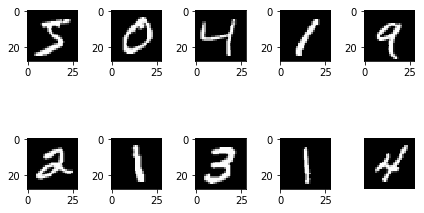

In [6]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [32]:
# Define your neural network
mnist_model = NeuralNetwork(784, 30, 10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Training time: 16.514031887054443


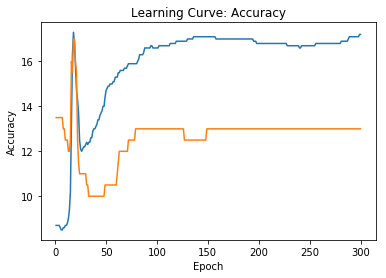

Accuracy:15.70%
Learning rate:0.10
Hidden neurons:30

 ########################################################## 

Training time: 16.542601585388184


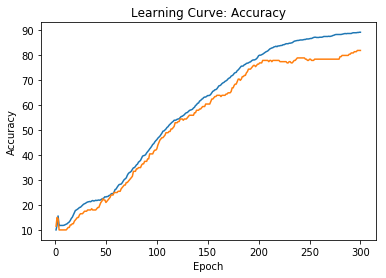

Accuracy:83.78%
Learning rate:1.00
Hidden neurons:30

 ########################################################## 

Training time: 16.437382221221924


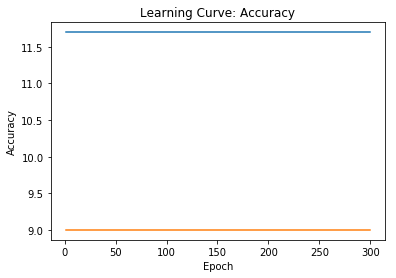

Accuracy:10.28%
Learning rate:10.00
Hidden neurons:30

 ########################################################## 



In [33]:
# Train NN and print accuracy on test data
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f%%' % (test_accuracy))
    print('Learning rate:%-2.2f' % (lambda_))
    print('Hidden neurons:%d' % (30))
    print('\n','##########################################################','\n')
    mnist_model.weights_init()

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training time: 15.803303718566895


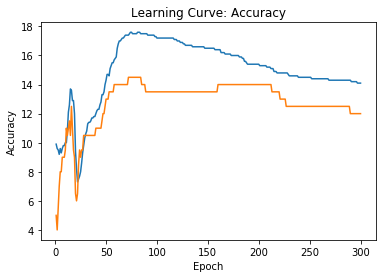

Accuracy:13.73%
Learning rate:0.10
Hidden neurons:15

 ########################################################## 

Training time: 15.508665800094604


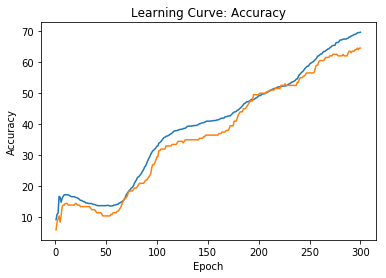

Accuracy:66.96%
Learning rate:1.00
Hidden neurons:15

 ########################################################## 

Training time: 15.65548825263977


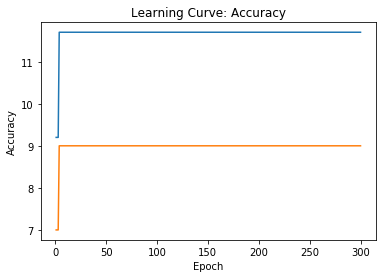

Accuracy:10.28%
Learning rate:10.00
Hidden neurons:15

 ########################################################## 



In [34]:
# Define your neural network
# 15 hidden neurons 
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
mnist_model = NeuralNetwork(784, 15, 10)
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f%%' % (test_accuracy))
    print('Learning rate:%-2.2f' % (lambda_))
    print('Hidden neurons:%d' % (15))
    print('\n','##########################################################','\n')
    mnist_model.weights_init()

Training time: 19.104137420654297


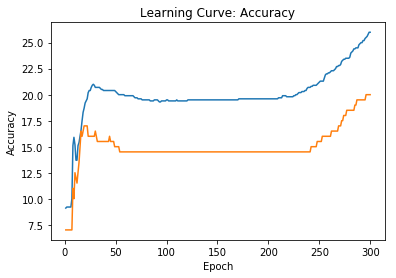

Accuracy:23.76%
Learning rate:0.10
Hidden neurons:75

 ########################################################## 

Training time: 19.205384731292725


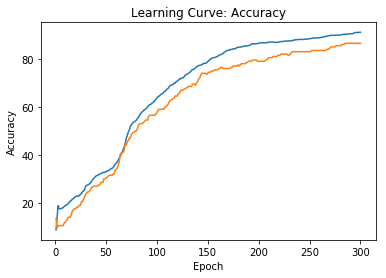

Accuracy:85.43%
Learning rate:1.00
Hidden neurons:75

 ########################################################## 

Training time: 18.79619026184082


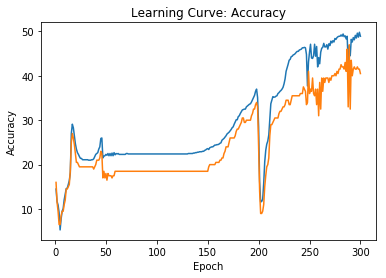

Accuracy:44.16%
Learning rate:10.00
Hidden neurons:75

 ########################################################## 



In [35]:
# 75 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
mnist_model = NeuralNetwork(784, 75, 10)
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f%%' % (test_accuracy))
    print('Learning rate:%-2.2f' % (lambda_))
    print('Hidden neurons:%d' % (75))
    print('\n','##########################################################','\n')
    mnist_model.weights_init()

<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Training time: 1.6106581687927246


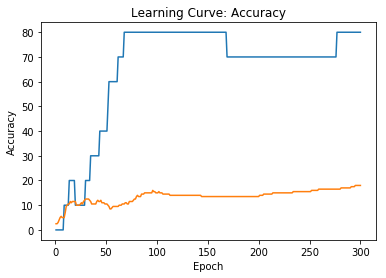

Accuracy:19.78%
Learning rate:0.10
Hidden neurons:30

 ########################################################## 

Training time: 1.4653384685516357


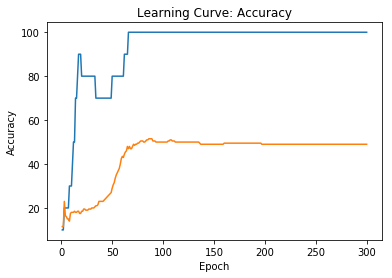

Accuracy:50.56%
Learning rate:1.00
Hidden neurons:30

 ########################################################## 

Training time: 1.4715938568115234


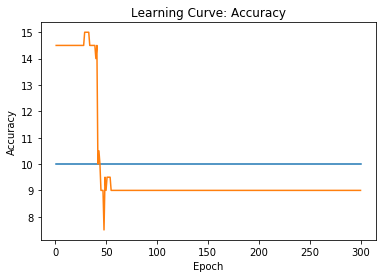

Accuracy:9.24%
Learning rate:10.00
Hidden neurons:30

 ########################################################## 



In [36]:
# Train NN and print accuracy on test data
# 30 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
mnist_model = NeuralNetwork(784, 30, 10)
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f%%' % (test_accuracy))
    print('Learning rate:%-2.2f' % (lambda_))
    print('Hidden neurons:%d' % (30))
    print('\n','##########################################################','\n')
    mnist_model.weights_init()

Training time: 1.3853676319122314


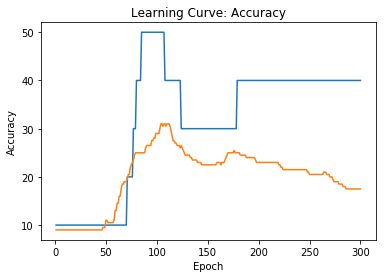

Accuracy:17.95%
Learning rate:0.10
Hidden neurons:15

 ########################################################## 

Training time: 1.4366049766540527


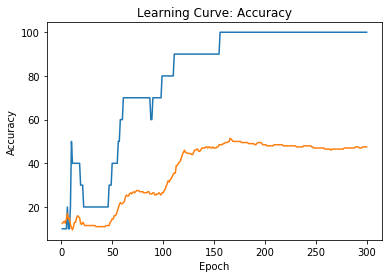

Accuracy:46.29%
Learning rate:1.00
Hidden neurons:15

 ########################################################## 

Training time: 1.4508602619171143


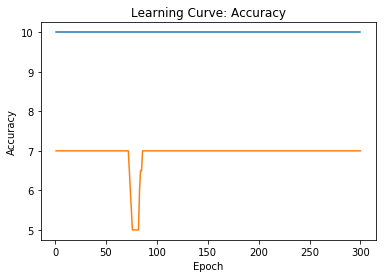

Accuracy:9.58%
Learning rate:10.00
Hidden neurons:15

 ########################################################## 



In [37]:
# 15 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
mnist_model = NeuralNetwork(784, 15, 10)
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f%%' % (test_accuracy))
    print('Learning rate:%-2.2f' % (lambda_))
    print('Hidden neurons:%d' % (15))
    print('\n','##########################################################','\n')
    mnist_model.weights_init()

Training time: 1.734393835067749


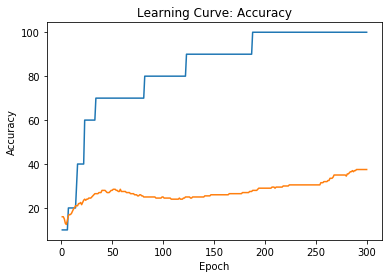

Accuracy:40.14%
Learning rate:0.10
Hidden neurons:75

 ########################################################## 

Training time: 1.7028391361236572


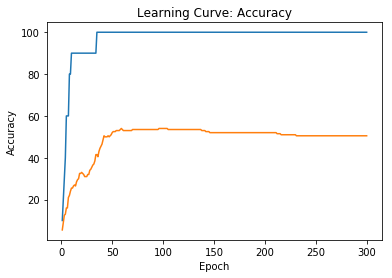

Accuracy:50.69%
Learning rate:1.00
Hidden neurons:75

 ########################################################## 

Training time: 1.723179578781128


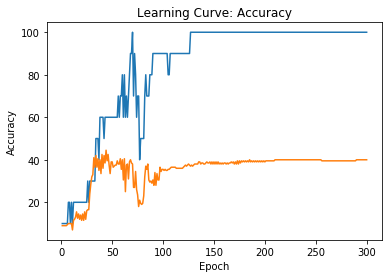

Accuracy:43.37%
Learning rate:10.00
Hidden neurons:75

 ########################################################## 



In [38]:
# 75 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
mnist_model = NeuralNetwork(784, 75, 10)
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f%%' % (test_accuracy))
    print('Learning rate:%-2.2f' % (lambda_))
    print('Hidden neurons:%d' % (75))
    print('\n','##########################################################','\n')
    mnist_model.weights_init()

#### Try with more iterations: 3000.

Training time: 15.599025249481201


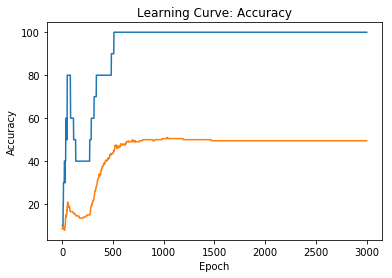

Accuracy:51.18%
Learning rate:0.10
Hidden neurons:30

 ########################################################## 

Training time: 14.094423294067383


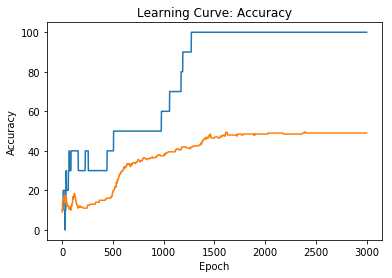

Accuracy:48.73%
Learning rate:0.10
Hidden neurons:15

 ########################################################## 

Training time: 17.00044870376587


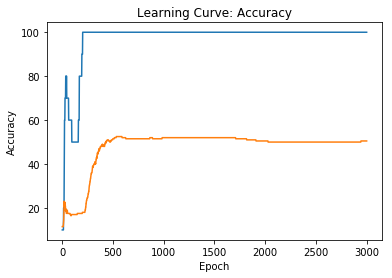

Accuracy:51.03%
Learning rate:0.10
Hidden neurons:75

 ########################################################## 



In [10]:
# Train NN and print accuracy on test data
# 30, 15 and 75 hidden neurons
# Learning rate 0.1
for h in [30, 15, 75]:
    mnist_model = NeuralNetwork(784, h, 10)
    mnist_model.train(vsmall_training_data, small_validation_data, iterations=3000, learning_rate=0.1)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f%%' % (test_accuracy))
    print('Learning rate:%-2.2f' % (0.1))
    print('Hidden neurons:%d' % (h))
    print('\n','##########################################################','\n')

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

Answer:

From the results obtained we can see the importance of the learning rate (and the number of iterations also). It is a hyper-parameter that controls the "step-size": how much we are adjusting the weights of our network with respect to the loss gradient. The lower the value, the slower we travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that we do not miss any local minima, it could also mean that we’ll be taking a long time to converge: if the learning rate is low, then the training is more reliable, but optimization will take a lot of time because steps towards the minimum of the loss function are tiny; if the learning rate is high, then training may not converge or even diverge (weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse). However, at the contrary, with low learning rate values, we may stuck in some local minima during the training.

Let's first consider only the cases with the training done on the "small dataset". We can see that in general the system performs well only when the learning rate is equal 1.0. In fact, by looking at the obtained accurancy values and at the plots which show their evolution during the training, we can see that only the cases with a learning rate of 1.0 give acceptable (good) results; both with lower (0.1) and higher learning rate values (10.0) we obtain a final accurancy always lower than 20% (exception made for the network with 75 hidden neurons which gives an accurancy of 44%). In the case of lr=0.1, one of the reasons for a so low final accurancy might be that we are using a too low number of iterations during the training; while in the case of lr=10, the obtained output is a clear sign of divergence. In fact, it's clear that both the accurancy curves (blue for the accurancy on the training set and orange for the accurancy on the test set) are diverging, with all those ups and downs and a "random" accurancy (often around 20%).

Among all the network configurations tried, the best result is the one with 75 hidden neurons and (as said above) learning rate = 1.0, with an accurancy over the 85%: [Accuracy:85.43%. Learning rate:1.00. Hidden neurons:75]<br>
Moreover, another thing to notice is that as we increase the number of neurons, the model gives best results; in fact, in the case of 15 neurons, the maximum accurancy got is ~66%, while, for both the 30 and 75 hidden neurons cases, considering lower learning rates only, we got always more than ~80% (respectively 83.78% and 85.43%).

A different speech should be done for the models trained with the very small dataset (only 10 samples). As expected, this is the worst in terms of accurancy and convergence; in fact, both with an high and low learning rate and whatever is the chosen architecture, the system obviously is not able to obtain the same results in terms of perfomances as with the larger training dataset. Also in this case, the best results are those obtained with a learning rate equals to 1.0, with an accurancy around the 50% in all the cases (15, 30 or 75 hidden neurons). Moreover, again, the more the number of hidden layer, the more stable the system is and the more the accurancy is.<br>
The main advantage of using a smaller training set is, obviously, the training time, which is way lower than the cases with bigger datasets.

Another experiment that we did is to increase the number of iterations for the training. The last 3 plots, in fact, have been generated within the training of a neural network with 30 hidden layers and a learning rate of 0.1. We just wanted to check whether the accurancy, which as we said above was very low at the beginning, was so low because of a local minima or because of the number of iterations. So from the obtained result, we can see that in all the cases (15, 30 and 75 hidden neurons), the accurancy improves a lot if compared to the one obtained with 300 iterations, but does not reach the same values we can obtained with a learning rate of 1.0. So this means that the model stucked on some local minima.

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

Answer:

Looking at the results obtained above, we would expect that the higher is the number of hidden neurons, the better are the performances we obtain. Generally, in fact, 'the optimal size of the hidden layer is usually between the size of the input and size of the output layers'. So in this case, with an input layer of size > 700 and an output layer of size 10, 75 neurons into the hidden layer seems to be the best choice. And this is also confirmed from the results above as the average accurancy obtained with this configurations is higher than the others.<br>
Moreover, as we said above, in order to avoid the system to diverge (and obtain an high accurancy as a consequence), we should keep the learning rate low. As above we have obtained the best results with a learning rate = 1.0, we expect this to happen also with the whole dataset.

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 1022.0729031562805


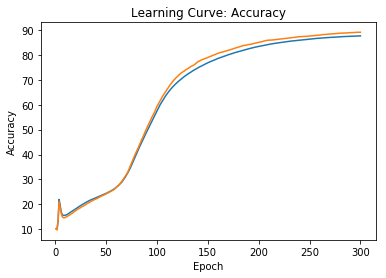

Accuracy  88.72


In [39]:
mnist_model = NeuralNetwork(784, 75, 10)
mnist_model.train(training_data, validation_data, iterations=300, learning_rate=1.0)
test_accuracy = mnist_model.predict(test_data) / 100
print('Accuracy  %-2.2f' % test_accuracy)

As expected, the accuracy obtained with the best chosen configuration and a bigger training set is the highest obtained until now.<br>
The main disadvantage in this case is the training time, which is much higher than the previous ones. This is obviously caused by the bigger training set, but the real reason behind that is the "batch gradient descent" approach used in the training method. In fact, by looking at the code of the 'train' function we can see that the whole dataset is used at each iteration.

So, if we want to find a good compromise between performances and training time, it could be a good idea to try with a variation of the training function: the mini batch gradient.

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = (o_i - t_i)$

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [17]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        # set output of the first layer
        self.o_input = np.array(inputs)
        # check if bias is already into the array, if so, avoid adding it
        if len(inputs[0]) < self.input_layer_size:
            self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        
        # hidden layer
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)
        self.o_hidden = self.transfer_f(self.u_hidden)
        # check if bias is already into the array, if so, avoid adding it
        if len(self.o_hidden[0]) < self.hidden_layer_size:
            self.o_hidden = np.append(self.o_hidden, np.ones((len(self.o_hidden), 1)), axis=1)
         
        # output layer
        self.u_output = self.o_hidden.dot(self.W_hidden_to_output)
        self.o_output = softmax(self.u_output)
        
        return self.o_output
    
    def backpropagate_xe(self, targets, learning_rate=5.0):
        # output error
        self.dE_du_hidden = self.o_output-targets

        # hidden error
        self.dE_du_output = np.multiply(self.dE_du_hidden.dot(self.W_hidden_to_output.T), self.o_hidden*(1-self.o_hidden))
        self.dE_du_output = np.delete(self.dE_du_output, -1, axis=1)

        # Update output weights
        self.W_hidden_to_output -= learning_rate * (2/len(targets)) * np.dot(self.dE_du_hidden.T, self.o_hidden).T

        # Update input weights
        self.W_input_to_hidden -= learning_rate * (2/len(targets)) * np.dot(self.dE_du_output.T, self.o_input).T

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

[Iteration  1/300]  -Training_Accuracy:  11.60 %  -Validation_Accuracy: 10.00 %  -time: 0.12 
    - MSE: 0.9018812320935071
    - X-Entropy: 2.3120474581431294
[Iteration  2/300]  -Training_Accuracy:  14.40 %  -Validation_Accuracy: 7.00 %  -time: 0.19 
    - MSE: 0.8977817430497615
    - X-Entropy: 2.2920682941734323
[Iteration  3/300]  -Training_Accuracy:  12.40 %  -Validation_Accuracy: 10.00 %  -time: 0.24 
    - MSE: 0.8940526247374592
    - X-Entropy: 2.2729917948810856
[Iteration  4/300]  -Training_Accuracy:  35.60 %  -Validation_Accuracy: 29.00 %  -time: 0.29 
    - MSE: 0.8885766991092394
    - X-Entropy: 2.249916806623127
[Iteration  5/300]  -Training_Accuracy:  25.60 %  -Validation_Accuracy: 21.50 %  -time: 0.35 
    - MSE: 0.8832225842825734
    - X-Entropy: 2.2224306822060753
[Iteration  6/300]  -Training_Accuracy:  52.10 %  -Validation_Accuracy: 42.00 %  -time: 0.40 
    - MSE: 0.8732484702199432
    - X-Entropy: 2.184576241822775
[Iteration  7/300]  -Training_Accuracy:  34

[Iteration 53/300]  -Training_Accuracy:  90.90 %  -Validation_Accuracy: 85.00 %  -time: 2.93 
    - MSE: 0.15917682002767958
    - X-Entropy: 0.3853546943267504
[Iteration 54/300]  -Training_Accuracy:  91.20 %  -Validation_Accuracy: 85.00 %  -time: 2.99 
    - MSE: 0.1560416554949345
    - X-Entropy: 0.37840332665485005
[Iteration 55/300]  -Training_Accuracy:  91.40 %  -Validation_Accuracy: 85.00 %  -time: 3.04 
    - MSE: 0.15307544682744637
    - X-Entropy: 0.37170642110609414
[Iteration 56/300]  -Training_Accuracy:  91.40 %  -Validation_Accuracy: 85.00 %  -time: 3.10 
    - MSE: 0.15018540690344825
    - X-Entropy: 0.3652480830049658
[Iteration 57/300]  -Training_Accuracy:  91.50 %  -Validation_Accuracy: 86.00 %  -time: 3.15 
    - MSE: 0.14742128519758438
    - X-Entropy: 0.35901412702274715
[Iteration 58/300]  -Training_Accuracy:  91.90 %  -Validation_Accuracy: 86.00 %  -time: 3.20 
    - MSE: 0.14473942262348607
    - X-Entropy: 0.35299131930573047
[Iteration 59/300]  -Training_A

[Iteration 105/300]  -Training_Accuracy:  96.60 %  -Validation_Accuracy: 88.00 %  -time: 5.74 
    - MSE: 0.07302504005494402
    - X-Entropy: 0.19164923567290346
[Iteration 106/300]  -Training_Accuracy:  96.80 %  -Validation_Accuracy: 88.00 %  -time: 5.80 
    - MSE: 0.07210298093156871
    - X-Entropy: 0.18958220388324779
[Iteration 107/300]  -Training_Accuracy:  96.90 %  -Validation_Accuracy: 88.00 %  -time: 5.85 
    - MSE: 0.07119506110715199
    - X-Entropy: 0.1875465435111243
[Iteration 108/300]  -Training_Accuracy:  96.90 %  -Validation_Accuracy: 88.00 %  -time: 5.90 
    - MSE: 0.07030093863595684
    - X-Entropy: 0.18554146593981818
[Iteration 109/300]  -Training_Accuracy:  96.90 %  -Validation_Accuracy: 87.50 %  -time: 5.96 
    - MSE: 0.0694202844070521
    - X-Entropy: 0.18356621356655325
[Iteration 110/300]  -Training_Accuracy:  96.90 %  -Validation_Accuracy: 87.50 %  -time: 6.01 
    - MSE: 0.06855278163916047
    - X-Entropy: 0.1816200581856531
[Iteration 111/300]  -Tra

[Iteration 157/300]  -Training_Accuracy:  98.60 %  -Validation_Accuracy: 87.50 %  -time: 8.52 
    - MSE: 0.03865064570427377
    - X-Entropy: 0.11381088090326998
[Iteration 158/300]  -Training_Accuracy:  98.70 %  -Validation_Accuracy: 87.50 %  -time: 8.57 
    - MSE: 0.03818569015284268
    - X-Entropy: 0.11273852428583843
[Iteration 159/300]  -Training_Accuracy:  98.70 %  -Validation_Accuracy: 87.50 %  -time: 8.63 
    - MSE: 0.0377260158571827
    - X-Entropy: 0.11167804910824262
[Iteration 160/300]  -Training_Accuracy:  98.70 %  -Validation_Accuracy: 87.50 %  -time: 8.68 
    - MSE: 0.037271539717202984
    - X-Entropy: 0.11062933102444188
[Iteration 161/300]  -Training_Accuracy:  98.70 %  -Validation_Accuracy: 87.50 %  -time: 8.73 
    - MSE: 0.03682218093483233
    - X-Entropy: 0.1095922503954443
[Iteration 162/300]  -Training_Accuracy:  98.70 %  -Validation_Accuracy: 87.50 %  -time: 8.79 
    - MSE: 0.036377861045905374
    - X-Entropy: 0.10856669201324394
[Iteration 163/300]  -

[Iteration 209/300]  -Training_Accuracy:  99.70 %  -Validation_Accuracy: 88.00 %  -time: 11.32 
    - MSE: 0.020262684248102042
    - X-Entropy: 0.07166715819458581
[Iteration 210/300]  -Training_Accuracy:  99.70 %  -Validation_Accuracy: 88.00 %  -time: 11.38 
    - MSE: 0.02000921332089811
    - X-Entropy: 0.07108652370121352
[Iteration 211/300]  -Training_Accuracy:  99.70 %  -Validation_Accuracy: 88.00 %  -time: 11.43 
    - MSE: 0.019759038223665967
    - X-Entropy: 0.07051280219765461
[Iteration 212/300]  -Training_Accuracy:  99.70 %  -Validation_Accuracy: 88.00 %  -time: 11.49 
    - MSE: 0.019512126770851835
    - X-Entropy: 0.0699458970749943
[Iteration 213/300]  -Training_Accuracy:  99.70 %  -Validation_Accuracy: 88.00 %  -time: 11.54 
    - MSE: 0.01926844627464033
    - X-Entropy: 0.06938571290219116
[Iteration 214/300]  -Training_Accuracy:  99.70 %  -Validation_Accuracy: 88.00 %  -time: 11.60 
    - MSE: 0.01902796360633075
    - X-Entropy: 0.06883215548325698
[Iteration 215

[Iteration 261/300]  -Training_Accuracy:  99.90 %  -Validation_Accuracy: 88.00 %  -time: 14.11 
    - MSE: 0.010727592028170072
    - X-Entropy: 0.0488500873070807
[Iteration 262/300]  -Training_Accuracy:  99.90 %  -Validation_Accuracy: 88.00 %  -time: 14.16 
    - MSE: 0.01060309777161801
    - X-Entropy: 0.048527972219378906
[Iteration 263/300]  -Training_Accuracy:  99.90 %  -Validation_Accuracy: 88.00 %  -time: 14.22 
    - MSE: 0.01048033324443173
    - X-Entropy: 0.04820926350334687
[Iteration 264/300]  -Training_Accuracy:  99.90 %  -Validation_Accuracy: 88.00 %  -time: 14.27 
    - MSE: 0.010359274012236538
    - X-Entropy: 0.0478939154026648
[Iteration 265/300]  -Training_Accuracy:  99.90 %  -Validation_Accuracy: 88.00 %  -time: 14.32 
    - MSE: 0.010239895858448377
    - X-Entropy: 0.047581882784363455
[Iteration 266/300]  -Training_Accuracy:  99.90 %  -Validation_Accuracy: 88.00 %  -time: 14.38 
    - MSE: 0.010122174789709512
    - X-Entropy: 0.047273121136371755
[Iteration 

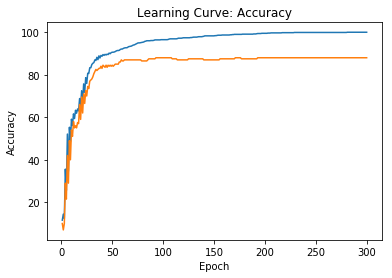

In [28]:
# Define your neural network
mnist_model_xe = NeuralNetwork(784, 30, 10)

# Train NN and print accuracy on validation data
mnist_model_xe.train_xe(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, verbose = True)

In [29]:
# Print accuracy on test data
test_accuracy = mnist_model_xe.predict(test_data) / 100
print('Accuracy:%-2.2f.' % test_accuracy)

Accuracy:87.11.


<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

Answer: 

Generally, cross-entropy is a better measure than MSE for classification, because the decision boundary in a classification task is large (in comparison with regression). MSE doesn’t punish misclassifications enough but is the right loss for regression, where the distance between two values that can be predicted is small.<br>
From a probabilistic point of view, the cross-entropy arises as the natural cost function to use if you have a softmax nonlinearity in the output layer of your network, and you want to maximize the likelihood of classifying the input data correctly. If instead you assume the target is continuous and normally distributed, and you maximize the likelihood of the output of the net under these assumptions, you get the MSE (combined with a linear output layer). So, for classification, cross-entropy tends to be more suitable than MSE.

As requested, we have used the same architecture used in the question 2.1.1, and as learning rate we have chosen to test the one which gave the best results among the three: 30 hidden neurons and learning rate = 1.0.

In this case, as expected, the network produced a very good result, with an accurancy (87.11%) higher than the one above with the MSE loss (83.78%). So the classifier trained with the MSE loss works fine, but the one with the cross-entropy worked better.

Another interesting thing to notice is that the new model reached a good accurancy value much earlier than the one older one; this can be easily seen by looking at the produced plot: the trend assumed by the MSE model is slower, and has a lower slope, while the one based on cross-entropy, reach an accurancy value higher than 80% very rapidly (at iteration num 32), while the other one reaches this value only after more than 250. This is a clear advantage of this method, which gives acceptable results much earlier than the other.

### 3. Another approach: mini batch

Goal of this section is to experiment with an alternative version of the training algorithm for the neural network. This implements a "mini-batch" gradient descent, where it is possibile to configure the batch size.

This is one of the most used techniques when training neural network because it does not suffer the main disadvantage of the batch gradient descent as does not use the whole dataset for making the updates (it does, but each update is made on each mini batch, so more than one update is made at each iteration), and it still gives very good perfomances in terms of accurancy of the trained model.

After having defined the function, we will run multiple times the algorithm, with differen batch size, analyzing the results and the performance obtained in the different situations. In particular, we will try to implement also "stochastic gradient descent", by running the algorithm with a batch size equal to 1, and then we will try with a batch size of 32 and 256 too.

In [11]:
def get_batches(dataset, batch_size):
    for i in np.arange(0, len(dataset[0]), batch_size):
        offset = min(i+batch_size, len(dataset[0]))
        yield (dataset[0][i:offset], dataset[1][i:offset])

class NeuralNetwork(NeuralNetwork):
    def train_minibatch(self, data, validation_data, iterations=50, learning_rate=5.0, batch_size=1, verbose=False):
        import time
        import random
        
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        errors = []
        best_val_acc = 100*self.predict(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        for it in range(iterations):
            data = list(zip(*data))
            random.shuffle(data) # shuffle data to make different batches at each iteration
            data = list(zip(*data))
            batches = get_batches(data, batch_size)
            error = 0
            num_batches = 0
            for (batch_inputs, batch_targets) in batches:
                # minibatches
                self.feedforward(batch_inputs)
                self.backpropagate(batch_targets, learning_rate=learning_rate)
                batch_error = batch_targets - self.o_output
                batch_error *= batch_error
                error += np.sum(batch_error)*len(batch_inputs)
                num_batches += 1
            error /= num_batches
            training_accuracies.append(100*self. predict(data)/len(data[0]))
            validation_accuracies.append(100*self.predict(validation_data)/len(validation_data[0]))
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations,
                                                            training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", error)
        print("Training time:", time.time()-start_time)
        plot_train_val(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy")

### Small training set

In this subsection we train the model using the small training set, with batch size of 256, 32 and 1 (SGD).

#### Batch size = 256

Training time: 19.806860208511353


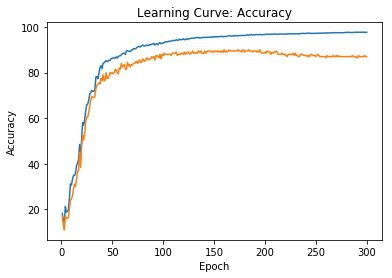

Accuracy  87.18


In [53]:
mnist_model = NeuralNetwork(784, 75, 10)
mnist_model.train_minibatch(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, batch_size=256)
test_accuracy = mnist_model.predict(test_data) / 100
print('Accuracy  %-2.2f' % test_accuracy)

#### Batch size = 32

Training time: 22.591731071472168


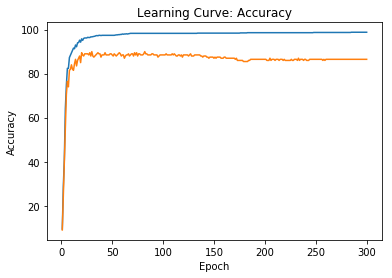

Accuracy  87.92


In [7]:
mnist_model = NeuralNetwork(784, 75, 10)
mnist_model.train_minibatch(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, batch_size=32)
test_accuracy = mnist_model.predict(test_data) / 100
print('Accuracy  %-2.2f' % test_accuracy)

#### Batch size = 1 (SGD)

Training time: 597.6244909763336


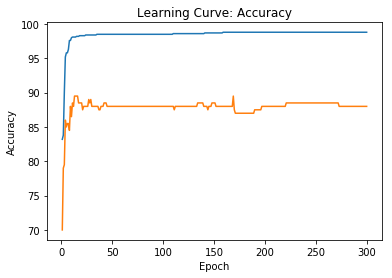

Accuracy  88.87


In [12]:
mnist_model = NeuralNetwork(784, 75, 10)
mnist_model.train_minibatch(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, batch_size=1)
test_accuracy = mnist_model.predict(test_data) / 100
print('Accuracy  %-2.2f' % test_accuracy)

### Big training set

Training time: 1114.766841173172


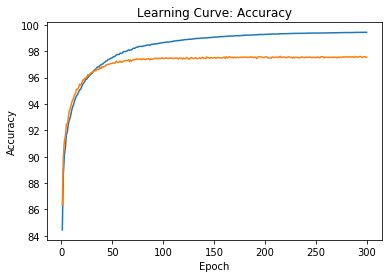

Accuracy  97.50


In [14]:
mnist_model = NeuralNetwork(784, 75, 10)
mnist_model.train_minibatch(training_data, validation_data, iterations=300, learning_rate=1.0, batch_size=256)
test_accuracy = mnist_model.predict(test_data) / 100
print('Accuracy  %-2.2f' % test_accuracy)

One important thing to notice here is the importance of the "batch size", that in this case is another parameter that can be tuned and which can change the behaviour and the results we obtain.

The batch size describes the size of each batch on which our dataset will be diveded into, exception made for the last one which could be smaller.

What appears really evident in this case is that we obtain better results in term of accuracy with respect to the ones obtained above (with the standard batch gradient descent training) in all the tried simulations. Both with the big and the small dataset as a training, we have always a final accurancy higher than 87%, while the best results obtained above were: ~85% with the small dataset and ~89% with the big one. In this case, when we trained with the big dataset we obtained an accurancy close to the perfection (97%!).

For time reasons we did not tried all the batches used with the small dataset also for the big one, as it would have taken too much for completing the execution.

One of the biggest advantages of the mini-batch (and of the stochastic as a consequence) with respect to the batch gradient descent is in the "training time". Despite in this case it appeared to be more or less the same looking at the execution time, the problem with Gradient Descent is when the data set is huge: calculating the parameters is expensive. For example if there are 1 billion sample points it has to go through the 1 billion sample points on each iteration to calculate the parameters. In SGD, a sample of training set or one training value is used to calculate the parameters instead of the entire sample space on each iteration, which is much faster.

In fact, one thing that can be noticed is the trend that the curve assumes in all the considered cases: as we reduce the size of the batch, we increment the number of times the parameters are updated during the training (because there will be more batches and so more updates!). In fact, here we can easily see that (in particular it is really evident in the case of the SGD) only few iterations are required to the system to converge: as the batch size decrease, it decrease also the number of iteration needed to reach a stable accurancy.

### 4.0 Mini-batch with xe

In this case, instead, we re-propose the same analysis done above with the mini batches within the context of the cross-entropy and softmax function.

So we have reimplemented also the train_xe function to adapt it to the mini batches.

In [22]:
class NeuralNetwork(NeuralNetwork):
    def train_minibatch_xe(self, data, validation_data, iterations=50, learning_rate=5.0, batch_size=1, verbose=False):
        import time
        import random
        
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        errors = []
        best_val_acc = 100*self.predict(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        for it in range(iterations):
            data = list(zip(*data))
            random.shuffle(data)
            data = list(zip(*data))
            batches = get_batches(data, batch_size)
            error = 0
            xe = 0
            num_batches = 0
            for (batch_inputs, batch_targets) in batches:
                # minibatches
                self.feedforward_xe(batch_inputs)
                self.backpropagate_xe(batch_targets, learning_rate=learning_rate)
                batch_error = batch_targets - self.o_output
                batch_error *= batch_error
                error += np.sum(batch_error)*len(batch_inputs)
                xe += np.sum(batch_targets*np.log(self.o_output)*(-1))*len(batch_inputs)
                num_batches += 1
            error /= num_batches
            xe /= num_batches
            training_accuracies.append(100*self. predict(data)/len(data[0]))
            validation_accuracies.append(100*self.predict(validation_data)/len(validation_data[0]))
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations,
                                                            training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", error)
                print("    - X-Entropy:", xe)
        print("Training time:", time.time()-start_time)
        plot_train_val(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy")

Here we re-run the same configuration seen in the question 2.1.1 to compare the results obtained above when using the cross entropy.

Then we run the xe training also for the 75 hidden neurons case.

#### 30 hidden neurons

Training time: 16.829057216644287


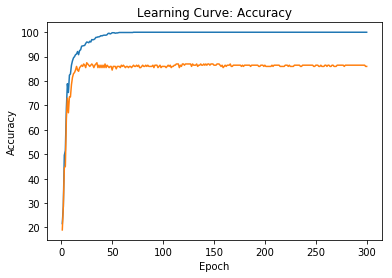

Accuracy  87.14


In [23]:
mnist_model = NeuralNetwork(784, 30, 10)
mnist_model.train_minibatch_xe(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, batch_size=256)
test_accuracy = mnist_model.predict(test_data) / 100
print('Accuracy  %-2.2f' % test_accuracy)

Training time: 18.40512490272522


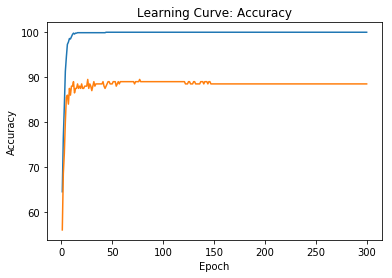

Accuracy  87.36


In [31]:
mnist_model = NeuralNetwork(784, 30, 10)
mnist_model.train_minibatch_xe(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, batch_size=32)
test_accuracy = mnist_model.predict(test_data) / 100
print('Accuracy  %-2.2f' % test_accuracy)

#### 75 hidden neurons

Training time: 19.365074396133423


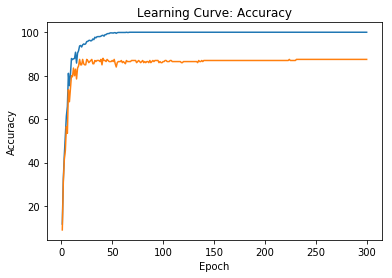

Accuracy  87.44


In [24]:
mnist_model = NeuralNetwork(784, 75, 10)
mnist_model.train_minibatch_xe(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, batch_size=256)
test_accuracy = mnist_model.predict(test_data) / 100
print('Accuracy  %-2.2f' % test_accuracy)

Training time: 22.233297109603882


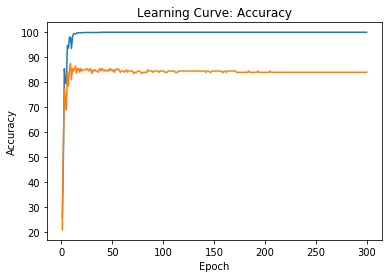

Accuracy  87.18


In [25]:
mnist_model = NeuralNetwork(784, 75, 10)
mnist_model.train_minibatch_xe(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, batch_size=32)
test_accuracy = mnist_model.predict(test_data) / 100
print('Accuracy  %-2.2f' % test_accuracy)

Here we have trained the model using only the small dataset, and considering only the cases with 256 and 32 as batch size.

The final accurancy is around 87% in all the cases.

This is really close to the results we have obtained with the MSE: in fact, in the section 3 we have tried different combinations of batch size, and the results are more or less the same.<br>
Same thing can be said for the model trained with the cross-entropy but using the gradient training, also in that case (question 2.2.2) we got an accurancy of 87%.

<div align="center"><b>THE END!</b>